## Download the data


In [1]:
import os
import tarfile
from six.moves import urllib
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
#Download the data
fetch_housing_data()

In [4]:
#Read the data to a pandas data frame:

housing=pd.read_csv("datasets/housing/housing.csv")

#But sometimes, you need to supply the data type of the column explicitly.
#This is particulary needed if you are trying to read a larger data set into a pandas df
#For example if the data set has a column with all numbers, but one row has a alphabet, then 
#pandas will treat some rows as integer and some as character (since the data is read in batches if the 
#dataset is huge, and pandas fails to infer the data type). Hence it is always suggested to supply the data types

##An example statement is shown below:

#with open('AUPPR001.ADDRESS_COMPLETE.csv','r') as f:
#    data=pd.read_csv(f, \
#                     dtype= \
#                     {0: int, 1: int, 2: str, 3: str}, \
#                     header=None,encoding='latin1',low_memory=False)



#Display initial rows:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#The info() method is useful to get a quick description of the data, in particular the total number of rows, 
#each attribute's type and the number pf non-null values

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
#Although the ocean_proximity column is listed as a python object, we know that it is string variable, 
#and we can identify the distribution of this variable's values using the value_counts() function:

housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Series object indices and values

We can see that **housing["ocean_proximity"].value_counts()** is a series object. You can access the series object values and indices as follows:

In [7]:
#To print indices:
print(housing["ocean_proximity"].value_counts().index)

#To print values:
print(housing["ocean_proximity"].value_counts().values)

Index(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')
[9136 6551 2658 2290    5]


## Example code to plot barchart

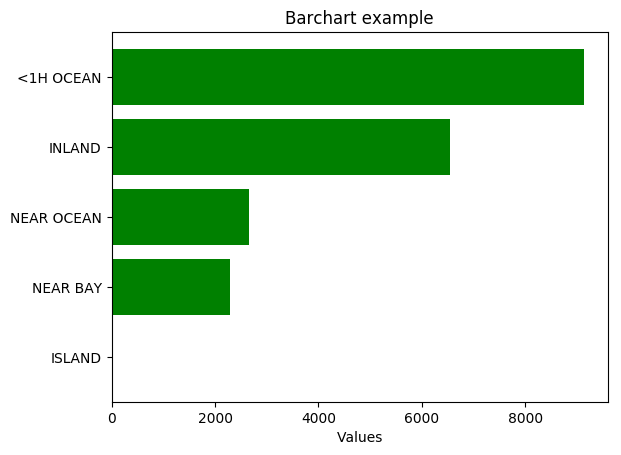

In [8]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
fig, ax = plt.subplots()

indices = list(housing["ocean_proximity"].value_counts().index)
y_pos = np.arange(len(indices))
values = list(housing["ocean_proximity"].value_counts().values)

#To plot percentages:
#values=list(housing["ocean_proximity"].value_counts().values/np.sum(housing["ocean_proximity"].value_counts().values) * 100)

ax.barh(y_pos, values, align='center',
        color='green' )
ax.set_yticks(y_pos)
ax.set_yticklabels(indices)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Values')
ax.set_title('Barchart example')

plt.show()

## Summary and describe:
To get the summary of all the columns in the data frame use df.info() and to get the numeric columns details, use df.describe()

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


NOTE that the NULL values are ignored while finding the numeric fields summary (*describe()*).

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Plot histograms of all the numeric variables in a data frame
To plot all the numeric fields histograms, just use the *df.hist()* function, as shown below:

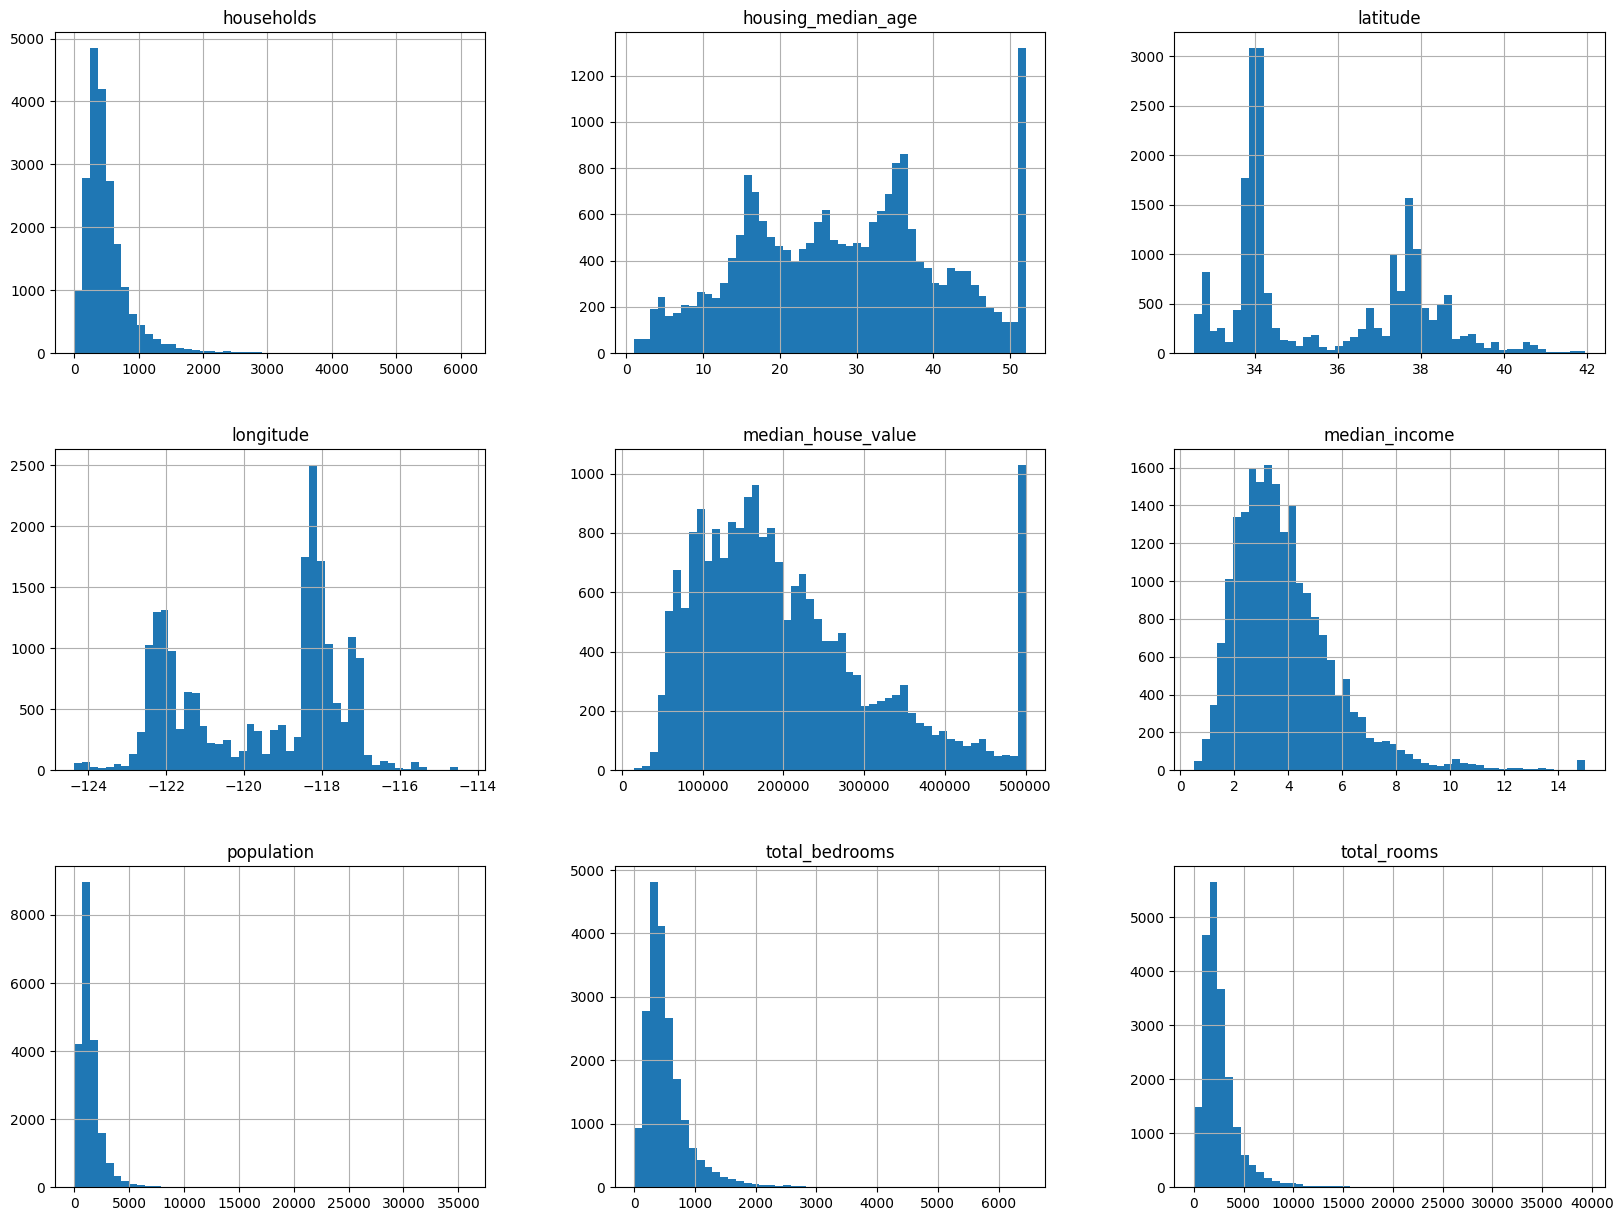

In [11]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Random permutation:

In [12]:
np.random.permutation(10)

array([2, 0, 9, 3, 4, 1, 5, 6, 7, 8])

## Random permutation can be used to split data into test and training sets

Although it is suggested to use built in scikit function, we can also code the test train split function using $np.random.permutation()$ function. ee page 49 of the text, for more info. 

## Stratified sampling.

We know (some how), that the median salary plats an important role in predicting the median ousing price. So to have equal representation of median salary, we need to divide the salary into sme classes, so that we can use *StratifiedShuffleSplit* of *sklearn.model_selection*. 

### Method-1 of stratified sampling

In [13]:
#Create bins of salary
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)

#Change all the salary category to 5, if the above column has any sal of greater than 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0,inplace=True)

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split =  StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

#sklearn.model_selection.StratifiedShuffleSplit(n_splits=10, test_size=’default’, train_size=None, random_state=None)

#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


## Method-II of stratified sampling (preferred method)

In [22]:
y = housing.pop("income_cat")
X = housing

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:

print("Train data: \n {}".format(y_train.value_counts()/len(y_train)))
print("Test data: \n {}".format(y_test.value_counts()/len(y_test)))

Train data: 
 3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
Test data: 
 3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


#### Keep aside the test data, and do NOT touch that

## Data exploration

If the training set is very large, try to sample some data from training data, and create exploration set.

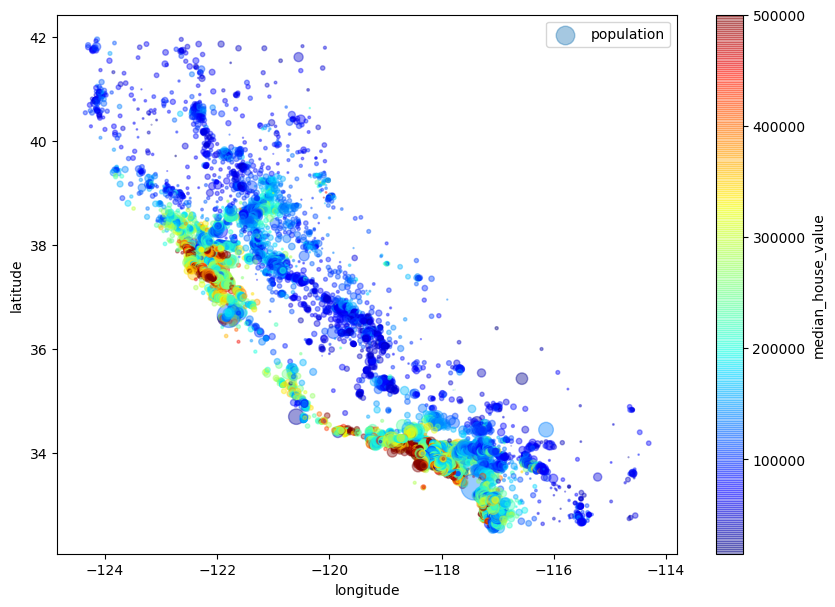

In [61]:
#Create a scatter plot of latitude and longitude
#setting "alpha=0.1" will help us to visualize the places where
#there is high density of data points
p=housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
                   s=housing["population"]/100,label="population",figsize=(10,7),
                   c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True,sharex=False)
p.legend()
plt.show()

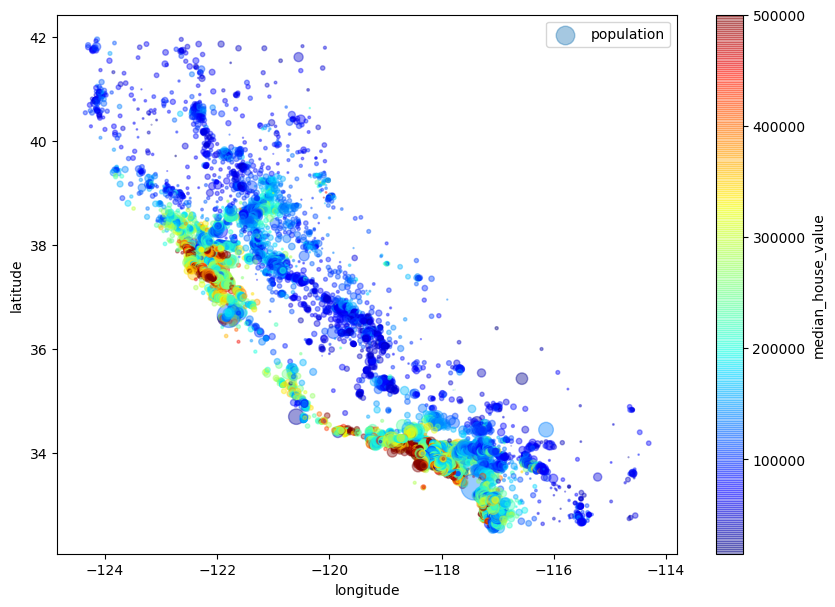

In [64]:
p=housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
p.legend()
plt.show()

## To find pearson's correlation between numerical attributes

In [65]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


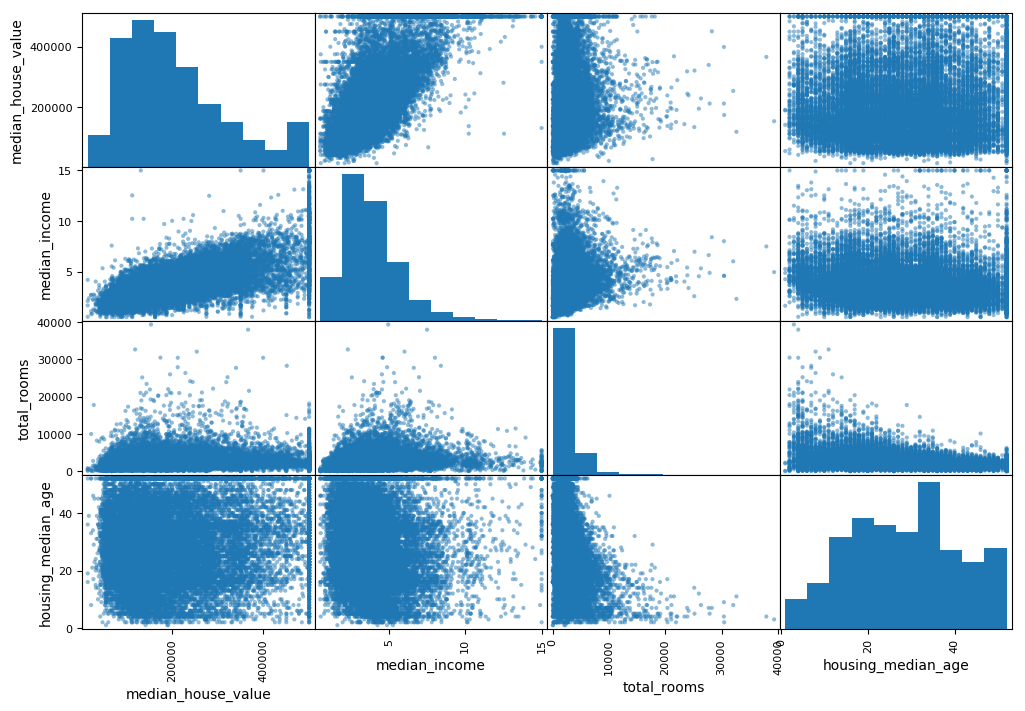

In [69]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]

scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

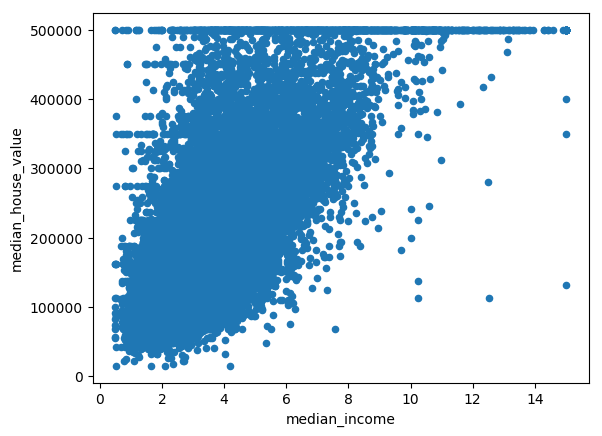

In [72]:
p=housing.plot(kind="scatter", x="median_income", y="median_house_value")
plt.show(p)

In [73]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


## Creating additional attributes
* households is nothing but number of houses.

* total_bedrooms in a district is not very useful. We will get he fraction of bedrooms out of all rooms in the district.

* We will also get the number of people per house hold, and total number of rooms per house hold

In [74]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [75]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967,-0.027540,0.092657,0.002476
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160,0.106389,-0.113815,0.002366
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623,-0.153277,0.136089,0.013191
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153,0.133798,-0.187900,-0.024581
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,0.084238,-0.028355
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650,-0.072213,0.035319,0.069863
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843,-0.080598,0.065087,-0.027309
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075,0.326895,-0.615661,0.018766
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000,0.151948,-0.255880,-0.023737
rooms_per_household,-0.027540,0.106389,-0.153277,0.133798,0.001538,-0.072213,-0.080598,0.326895,0.151948,1.000000,-0.416952,-0.004852


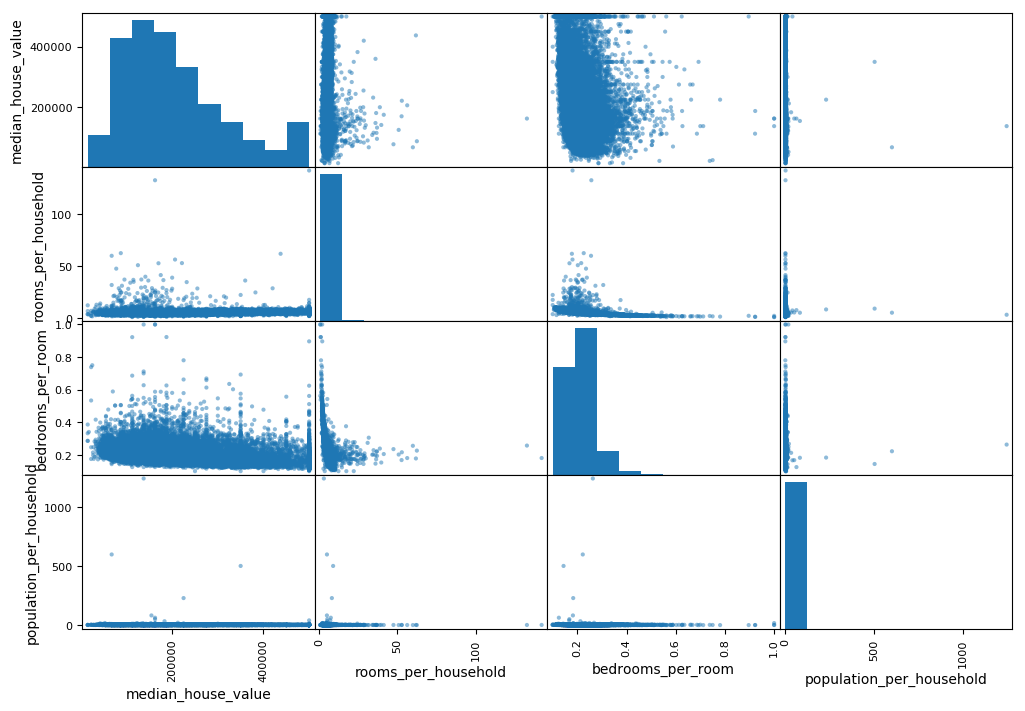

In [77]:
attributes = ["median_house_value","rooms_per_household","bedrooms_per_room","population_per_household"]

scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

## Handling NA values

To drop NA values for a specific column in a data frame. The number of rows in the data frame will be reduced, since the rows with NA values in a specific column will be dropped.

In [13]:
#total_bedrooms has some A values
#This wont modify the housing data set
housing.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


To drop a column from a data frame:

In [16]:
#The dataset wont be modified
housing.drop("total_bedrooms",axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,1551,714,3.6912,261100,NEAR BAY


To fill NA values with a specific value, say median of the column...

In [18]:
median = housing["total_bedrooms"].median()

#This will modify the data frame, since we used inplace=True option
housing["total_bedrooms"].fillna(median,inplace=True)

In [20]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.5+ MB


## Using Imputer to handle NA values

In [21]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

Imputer only expects numerical attributes. Our housing data set has categorical attribute ocean_proximity

### Collecting all columns, except one column from a data frame to another data frame
We will create another data frame housing_num

In [24]:
#This wont modify the housing dataframe
housing_num = housing.drop("ocean_proximity", axis=1)

In [25]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


In [29]:
#Imputes all the numerical values with median values of the respective columns.
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [30]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20640 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5)
memory usage: 1.4 MB


Imputer has a variable called *statistics\_*. It will store all the median values of all the numerical variables. 

In [31]:
imputer.statistics_

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.53480000e+00,   1.79700000e+05])

In [35]:
a=np.ones(4)

In [36]:
b=np.zeros((4,10))

In [39]:
print(b)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [40]:
housing.values

array([[-122.23, 37.88, 41, ..., 8.3252, 452600, 'NEAR BAY'],
       [-122.22, 37.86, 21, ..., 8.3014, 358500, 'NEAR BAY'],
       [-122.24, 37.85, 52, ..., 7.2574, 352100, 'NEAR BAY'],
       ..., 
       [-121.22, 39.43, 17, ..., 1.7, 92300, 'INLAND'],
       [-121.32, 39.43, 18, ..., 1.8672, 84700, 'INLAND'],
       [-121.24, 39.37, 16, ..., 2.3886, 89400, 'INLAND']], dtype=object)

In [42]:
list(housing)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

In [46]:
housing.iloc[:,:5]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms
0,-122.23,37.88,41,880,129.0
1,-122.22,37.86,21,7099,1106.0
2,-122.24,37.85,52,1467,190.0
3,-122.25,37.85,52,1274,235.0
4,-122.25,37.85,52,1627,280.0
5,-122.25,37.85,52,919,213.0
6,-122.25,37.84,52,2535,489.0
7,-122.25,37.84,52,3104,687.0
8,-122.26,37.84,42,2555,665.0
9,-122.25,37.84,52,3549,707.0


# Doing it again ... 
Let us do it from the beginning. This time we will automate the process as much as we can using pipelines. This process automation will help us to evaluate many hyper-parameters.

## Reading the data to a data frame

In [90]:
housing=pd.read_csv("datasets/housing/housing.csv")

## Split the data into training and test

We want to stratify the split in such a way that the income attribute values are distributed correctly. So to apply stratified sampling, we will create income category, and stratify the split so that both the test and training data will bahe the same proportions of income categories.

In [91]:
#Create bins of salary
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)

#Change all the salary category to 5, if the above column has any sal of greater than 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0,inplace=True)

#This will remove the new column from the data frame
y = housing.pop("income_cat")
X = housing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("Train data: \n {}".format(y_train.value_counts()/len(y_train)))
print("Test data: \n {}".format(y_test.value_counts()/len(y_test)))


housing_train = X_train
housing_test  = X_test

Train data: 
 3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64
Test data: 
 3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


## Preparing pipeline

_(text from the book)_ We want our transformer to work seamlessly with scikit-learn functionality such as pipelines. To accomplish this, we need to create a class and implement three methods: $fit()$, _transform()_ and $fit\_transform$. We do not need to implement $fit\_transform$, if we add $TransformerMixin$ as a base class. Also if we add $BaseEstimator$ as a base class you will get 2 extra methods: $get\_parms()$ and $set\_parms$ that will be useful for automatic hyperparameter tuning. 

In summary we would like to perform the following:
We are not sure whether adding a new column $bedrooms\_per\_room$ is beneficial or not. So we want to treat this as a hyper-parameter, so that we can check its effect in a grid search. We can achieve this by defining a class, as shown below:


In [92]:
from sklearn.base import BaseEstimator, TransformerMixin

#Get the column locations of the columns, which will be used in transformation (or creating new attributes)
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6


#We are sure that rooms_per_household and rooms_per_household will definitely help, but not sure about
#bedrooms_per_room. So we want to treat this as a hyper parm for transformation.

class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #NO *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self #Nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            #np.c_ will concatenate the new columns to the matrix X
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

## Pipeline for data preparation
We will take out the numerical attributes, and replace the NA values with median values of the respective columns. This is needed for columns which do not have any NA values, since in the real world we can get NA value for any attribute once the model is deployed in PROD. For the categorical variables we will use LabelBinarizer to create a set of columns with 1 and 0 values. Then the transformed data will be combined to form the final data frame. NOTE that these transformations will only be applied to training data. Usually we do not apply any transformation to the target variable or label variable

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

#This will help us to select the desired columns of a data frame
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [75]:
housing_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


Let us extract the label column to housing_train_label. We should NOT apply any transformation to the label.

In [94]:
housing_train_label=housing_train.pop("median_house_value")

Except the ocean_proximity, all other attributes are numeric. Let us get the numeric attributes and categorica attributes separately.

In [95]:
all_columns = list(housing_train) #Will get the column names as a list
numeric_columns = all_columns[:-1]
categorical_columns = all_columns[-1]
print(numeric_columns)
print(categorical_columns)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
ocean_proximity


In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.pipeline import FeatureUnion
#StandardScaler will standardize the numeric columns


num_pipeline = Pipeline([ \
                         ('selector',DataFrameSelector(numeric_columns)), \
                         ('imputer', Imputer(strategy="median")), \
                         ('attribs_adder', CombinedAttributesAddr()), \
                         ('std_scaler',StandardScaler()) \
                        ])
cat_pipeline = Pipeline([ \
                         ('selector',DataFrameSelector(categorical_columns)), \
                         ('label_binarizer', LabelBinarizer()) \
                        ])

#Combine the numeric and categorical transformations into a single numpy matrix
full_pipeline = FeatureUnion(transformer_list = [ \
                                                 ("num_pipeline",num_pipeline),
                                                 ("cat_pipeline",cat_pipeline)
                                                ])


In [97]:
housing_train_prepared = full_pipeline.fit_transform(housing_train)

In [98]:
housing_train_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ..., 
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [99]:
housing_train_prepared.shape

(16512, 16)

In [100]:
housing_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

The housing_train_prepared numpy matrix has all the training data, and the object housing_train_label has all the target values for this training data. 

## Training some models
Let us train a liner regression model

### Linear regressor

In [102]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_train_prepared,housing_train_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let us evaluate the model on some of the observations in the training data itself

In [108]:
some_data = housing.iloc[:5] #Gets the first 5 rows. 
#some_data also has the target column, but our transformations will eliminate that
some_labels = housing["median_house_value"].iloc[:5] 

some_prepared_data = full_pipeline.transform(some_data) 

#The some_prepared_data has NO target label
lin_reg.predict(some_prepared_data)

array([ 405584.92984552,  431508.35235575,  377292.90599191,
        319278.52422105,  253228.0387011 ])

In [110]:
#Actual labels
some_labels

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [111]:
from sklearn.metrics import mean_squared_error
housing_train_predictions = lin_reg.predict(housing_train_prepared)
lin_mse = mean_squared_error(housing_train_label,housing_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.198198489219

### Decision tree regressor
Let us train a decision tree regressor

In [116]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor()
dt_reg.fit(housing_train_prepared,housing_train_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [117]:
from sklearn.metrics import mean_squared_error
housing_train_predictions = dt_reg.predict(housing_train_prepared)
dt_mse = mean_squared_error(housing_train_label,housing_train_predictions)
dt_rmse = np.sqrt(dt_mse)
dt_rmse

0.0

Decision Tree regressor is overfitting, since we got 0 training error, while linear regressor might be underfitting. 
Let us train RandomForestRegressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(housing_train_prepared,housing_train_label)
housing_train_predictions = rf_reg.predict(housing_train_prepared)
rf_mse = mean_squared_error(housing_train_label,housing_train_predictions)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

22175.712873559536

The RMSE of Random Forest Regressor on the training data is much lower than Linear Regressor, and also it is not performing over fitting, since the there is some training error. But we will validate this error using 10 fold Cross Validation.

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf_reg,housing_train_prepared,housing_train_label, scoring = "neg_mean_squared_error", cv=10)
print(scores)
rf_rmse_scores = np.sqrt(-scores)
print(rf_rmse_scores)

[ -2.74284774e+09  -2.53477851e+09  -2.72665816e+09  -2.99696590e+09
  -2.65340029e+09  -3.04609706e+09  -2.64542791e+09  -2.54483399e+09
  -3.02445829e+09  -2.79345087e+09]
[ 52372.20386149  50346.58394455  52217.41245187  54744.55136316
  51511.16662421  55191.45820359  51433.72347104  50446.34768593
  54995.07512733  52853.10652925]


## Fine tune the model
Selecting the optimal set of hyper-parms using the method of CV

In [125]:
from sklearn.model_selection import GridSearchCV

parm_grid = [{'n_estimators': [3,10,30],'max_features': [2,4,6,8]},
             {'bootstrap': [False],'n_estimators':[3,10],'max_features':[2,4]}]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg,parm_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_train_prepared,housing_train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [130]:
cvres=grid_search.cv_results_
for mean_score,parms in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),parms)

63774.0955064 {'max_features': 2, 'n_estimators': 3}
55654.5435917 {'max_features': 2, 'n_estimators': 10}
52949.3328372 {'max_features': 2, 'n_estimators': 30}
60898.9386893 {'max_features': 4, 'n_estimators': 3}
52455.8915864 {'max_features': 4, 'n_estimators': 10}
50455.0697852 {'max_features': 4, 'n_estimators': 30}
59146.878066 {'max_features': 6, 'n_estimators': 3}
52026.8054356 {'max_features': 6, 'n_estimators': 10}
50202.6620433 {'max_features': 6, 'n_estimators': 30}
57769.2853471 {'max_features': 8, 'n_estimators': 3}
52544.5348478 {'max_features': 8, 'n_estimators': 10}
49981.0386466 {'max_features': 8, 'n_estimators': 30}
61694.4515566 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54562.221516 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58596.0796158 {'bootstrap': False, 'max_features': 4, 'n_estimators': 3}
51914.7755625 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


To find the best estimator

In [132]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

To find the features importances using random forests ...

In [149]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attributes = ["rooms_pre_hhold", "pop_per_hhold","bedrooms_per_room"]


#See that the cat_pipeline is having LabelBinarize as oneof the step, and hence it has classes_
cat_one_hot_attributes = list(cat_pipeline.classes_)
#We will get the first 9 attributes as the numeric attributes rom housing data set.
attributes = list(housing_train.columns)[0:9] + extra_attributes + cat_one_hot_attributes 
sorted(zip(feature_importances,attributes),reverse=True)


[(0.36952660333667453, 'median_income'),
 (0.16423073385980097, '<1H OCEAN'),
 (0.11330328924847427, 'rooms_pre_hhold'),
 (0.066020266349292117, 'longitude'),
 (0.062811571940271843, 'pop_per_hhold'),
 (0.059866287011191448, 'latitude'),
 (0.05033170969561189, 'ocean_proximity'),
 (0.04402256654358068, 'housing_median_age'),
 (0.015655779111849455, 'total_bedrooms'),
 (0.014975619673960374, 'population'),
 (0.014924803143032206, 'total_rooms'),
 (0.014769219754117427, 'households'),
 (0.0046315752976391501, 'bedrooms_per_room'),
 (0.0033717014947631063, 'NEAR BAY'),
 (0.0014625952978040051, 'ISLAND'),
 (9.5678241936457441e-05, 'INLAND')]

# Exercises
Trying SVM

In [152]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

parm_grid = [{'kernel': ['linear'],'C':[0.1,2]},
             {'kernel': ['rbf'],'C':[0.1,2],'gamma':['auto',.8]}]

svm_reg = SVR()

grid_search = GridSearchCV(svm_reg,parm_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_train_prepared,housing_train_label)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [0.1, 2]}, {'kernel': ['rbf'], 'C': [0.1, 2], 'gamma': ['auto', 0.8]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [18]:
from sklearn.preprocessing import StandardScaler

data = [[0, 0], [0, 0], [1, 1], [1, 1]]
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [19]:
scaler.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelBinarizer, MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import Imputer

In [59]:
class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): #NO *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self #Nothing else to do
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            #np.c_ will concatenate the new columns to the matrix X
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

#This will help us to select the desired columns of a data frame
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
    def fit(self,X, y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values


class ScaleData(BaseEstimator, TransformerMixin):
    def __init__(self,std_scalar=True):
        self.std_scalar = std_scalar
    def fit(self,X, y=None):
        if self.std_scalar == True:
           self.scaler = StandardScaler()
        else:
           self.scaler = MinMaxScaler()
        return self.scaler.fit(X)

    def transform(self,X):
        return self.scaler.transform(X)



In [60]:
data = [[1, 10], [2, 20], [3, 30], [4, 40]]
num_pipeline = Pipeline([('scale1',ScaleData(std_scalar=True)),('scale2',ScaleData(std_scalar=False))]) 



In [61]:
num_pipeline.fit_transform(data)

array([[ 0.        ,  0.        ],
       [ 0.33333333,  0.33333333],
       [ 0.66666667,  0.66666667],
       [ 1.        ,  1.        ]])

In [62]:
num_pipeline.transform(data)

array([[ 0.        ,  0.        ],
       [ 0.33333333,  0.33333333],
       [ 0.66666667,  0.66666667],
       [ 1.        ,  1.        ]])

In [63]:
housing_label=housing.pop("median_house_value")
all_columns = list(housing) #Will get the column names as a list
numeric_columns = all_columns[:-1]
categorical_columns = all_columns[-1]
print(numeric_columns)
print(categorical_columns)

KeyError: 'median_house_value'

In [64]:
num_pipeline = Pipeline([ \
                         ('selector',DataFrameSelector(numeric_columns)), \
                         ('imputer', Imputer(strategy="median")), \
                         ('attribs_adder', CombinedAttributesAddr()), \
                         ('scaler',ScaleData()) \
                        ])
cat_pipeline = Pipeline([ \
                         ('selector',DataFrameSelector(categorical_columns)), \
                         ('label_binarizer', LabelBinarizer()) \
                        ])

#Combine the numeric and categorical transformations into a single numpy matrix
full_pipeline = FeatureUnion(transformer_list = [ \
                                                 ("num_pipeline",num_pipeline),
                                                 ("cat_pipeline",cat_pipeline)
                                                ])

In [68]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
full_pipeline.transform(housing)

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.        ,
         1.        ,  0.        ],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.        ,
         1.        ,  0.        ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  0.        ,
         1.        ,  0.        ],
       ..., 
       [-0.8237132 ,  1.77823747, -0.92485123, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87362627,  1.77823747, -0.84539315, ...,  0.        ,
         0.        ,  0.        ],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.        ,
         0.        ,  0.        ]])

In [86]:
#full_pipeline.fit_transform(housing)
from sklearn.ensemble import RandomForestRegressor
prepare_and_train = Pipeline([
    ('preparation', full_pipeline),
    ('rf_reg',RandomForestRegressor())
    
])
prepare_and_train.fit(housing)

AttributeError: 'Pipeline' object has no attribute 'get_parms'

In [89]:
from sklearn.model_selection import GridSearchCV

parm_grid = [
    #{'n_estimators':[3,10],'max_features':[2,4],preparation__num_pipeline__scaler__std_scalar: [True,False]}
    {'rf_reg__n_estimators':[3,10],'rf_reg__max_features':[2,4]}
]

grid_search=GridSearchCV(prepare_and_train, parm_grid,cv=5,scoring='neg_mean_squared_error')

grid_search.fit(housing,housing_label)

TypeError: fit() takes 2 positional arguments but 3 were given